In [ ]:
// Read .csv file in Rust IDEs e.g. VS Code etc.
/*use polars_core::prelude::*;
use polars_io::prelude::*;
use std::fs::File;

fn example() -> PolarsResult<DataFrame> {
    CsvReader::from_path("iris_csv")?
            .has_header(true)
            .finish()
}

In [2]:
// Set up required dependencies
:dep ndarray = "0.15.6"

In [3]:
:dep plotly = { version = ">=0.8.0", features = ["plotly_ndarray"]}

In [4]:
// May take a few minutes to load polars crate
:dep polars = { version = ">=0.26.0", features = ["lazy", "csv-file", "strings", "dtype-duration", "dtype-categorical", "concat_str", "rank", "lazy_regex", "ndarray"]}

In [5]:
// May not need this
:dep itertools = {version = "0.9.0"}

In [45]:
//:dep rayon = "1.6.1"

In [100]:
//:dep arrow = "32.0.0"

In [101]:
// Import external crates needed
extern crate ndarray;
extern crate plotly;
extern crate polars;
//extern crate rayon;
//extern crate arrow;

In [47]:
// Specify imports/modules required
// May not need following line
//use ndarray::{Array, Ix1, Ix2};
//use ndarray::Array;
//Check - may not need ndarray prelude
use ndarray::prelude::*;
use std::str::FromStr;
use polars::prelude::*;
use polars::frame::DataFrame;
use plotly::common::{
    ColorScale, ColorScalePalette, DashType, Fill, Font, Line, LineShape, Marker, Mode, Title,
};
use plotly::layout::{Axis, BarMode, Layout, Legend, TicksDirection};
use plotly::{Plot, Scatter, Bar};
use itertools::Itertools;
//use rayon::prelude::*;

In [8]:
// Reading .csv file
let df_1 = CsvReader::from_path("ace_para_count.csv").unwrap().finish().unwrap();

In [9]:
df_1

shape: (6, 2)
┌──────────────┬───────┐
│ Colour       ┆ count │
│ ---          ┆ ---   │
│ str          ┆ i64   │
╞══════════════╪═══════╡
│ ORANGE;BROWN ┆ 1     │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ RED          ┆ 1     │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ WHITE        ┆ 7     │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ BLUE         ┆ 2     │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ YELLOW;WHITE ┆ 1     │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ ORANGE       ┆ 1     │
└──────────────┴───────┘

In [10]:
/*let src4: &str = r#"g{'race'}"#;
  let string4 = String::from(src4);
  let char4: Vec<char> = src4.chars().collect();
  let byte4: Vec<u8> = src4.as_bytes().to_vec();
  println!("str:{:?} | String:{:?}, Vec<char>:{:?}, Vec<u8>:{:?}", src4, string4, char4, byte4);

let df: DataFrame = df!("Name" => &["Methane", "Ethane", "Propane"],
                        "Carbon" => &[1, 2, 3],
                        "Hydrogen" => &[4, 6, 8])?;
let sv: Vec<Series> = df.select_series(&["Carbon", "Hydrogen"])?;
assert_eq!(df["Carbon"], sv[0]);
*/
let Colours = df_1[0].clone();

In [11]:
Colours

shape: (6,)
Series: 'Colour' [str]
[
	"ORANGE;BROWN"
	"RED"
	"WHITE"
	"BLUE"
	"YELLOW;WHITE"
	"ORANGE"
]

In [74]:
println!("{}", &Colours.iter().format("\n"));

"ORANGE;BROWN"
"RED"
"WHITE"
"BLUE"
"YELLOW;WHITE"
"ORANGE"


In [12]:
// Switch Polars dataframe into 2D array
// Ensure "ndarray" was added as one of the features for polars under dependencies

//Example from documentation:
//let df = DataFrame::new(vec![a, b]).unwrap();
//let ndarray = df.to_ndarray::<Float64Type>().unwrap();
//println!("{:?}", ndarray);

let ndarray = df_1.to_ndarray::<Float64Type>().unwrap();
println!("{:?}", ndarray);

[[NaN, 1.0],
 [NaN, 1.0],
 [NaN, 7.0],
 [NaN, 2.0],
 [NaN, 1.0],
 [NaN, 1.0]], shape=[6, 2], strides=[1, 6], layout=Ff (0xa), const ndim=2


In [ ]:
// From: https://docs.rs/polars/latest/polars/docs/eager/index.html#series
//Extracting data:
//To be able to extract data out of Series, 
//either by iterating over them or converting them to other datatypes like a Vec<T>, 
//we first need to downcast them to a ChunkedArray<T>. 
//This is needed because we don’t know the data type that is held by the Series.

use polars::prelude::*;
use polars::df;

fn extract_data() -> PolarsResult<()> {
    let df = df! [
       "a" => [None, Some(1.0f32), Some(2.0)],
       "str" => ["foo", "bar", "ham"]
    ]?;

    // first extract ChunkedArray to get the inner type.
    let ca = df.column("a")?.f32()?;

    // Then convert to vec
    let to_vec: Vec<Option<f32>> = Vec::from(ca);

    // ***We can also do this with iterators***
    let ca = df.column("str")?.utf8()?;
    let to_vec: Vec<Option<&str>> = ca.into_iter().collect();
    let to_vec_no_options: Vec<&str> = ca.into_no_null_iter().collect();

    Ok(())
}

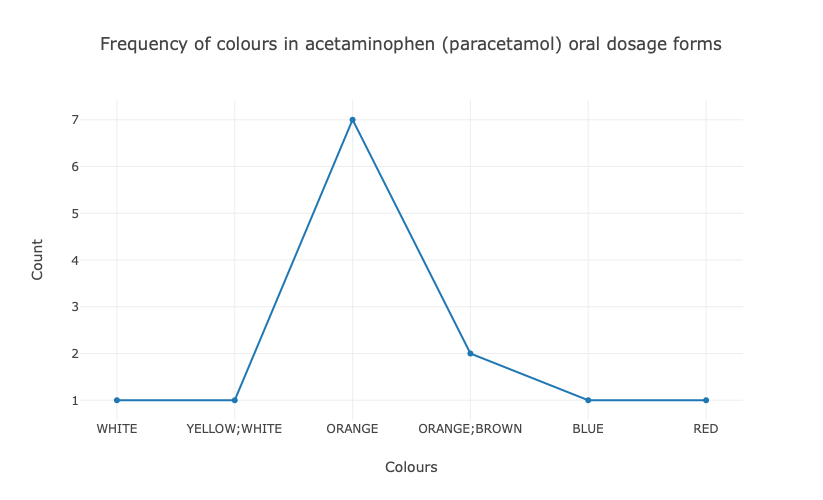

In [107]:
// MANUAL Sample method:
// Use vec! macro to create new vectors to hold x variables (words as strings) for plotting
// Manually input the colour names (as ndarray is only for numbers)
let x = vec!["WHITE", "YELLOW;WHITE", "ORANGE", "ORANGE;BROWN", "BLUE", "RED"];

// TRIAL importing from df - need to sort out series/chunkedarray 
//-> ?convert Vec<Series> to ChunkedArray



// Plot using ndarray, which is supported by Plotly.rs (Polars not supported yet)
// Convert ndarray (holding counts as y variables) into vector for plotting
let y = ndarray.column(1).to_vec();

// Use trace as a graph module,
// choose which type of plots is needed with x & y variables called
// Graph options e.g. Scatter, Line or Bar
let trace = Scatter::new(x, y);

// Set plot variable as mutable and initiate a plot
let mut plot = Plot::new();
// Add trace (graph) into the plot variable
plot.add_trace(trace);

// Specify the specs for plot
let layout = Layout::new()
    // Choose height of graph
    .height(500)
    // Name x-axis
    .x_axis(Axis::new().title(Title::new("Colours")))
    // Name y-axis
    .y_axis(Axis::new().title(Title::new("Count")))
    // Add title of graph
    .title(Title::new("Frequency of colours in acetaminophen (paracetamol) oral dosage forms"));

// Set the layout of the plot
plot.set_layout(layout);

// Display the plot in Jupyter Lab format 
// note for Jupyter Notebook - plot.notebook_display();
plot.lab_display();
format!("EVCXR_BEGIN_CONTENT application/vnd.plotly.v1+json\n{}\nEVCXR_END_CONTENT", plot.to_json())